# 

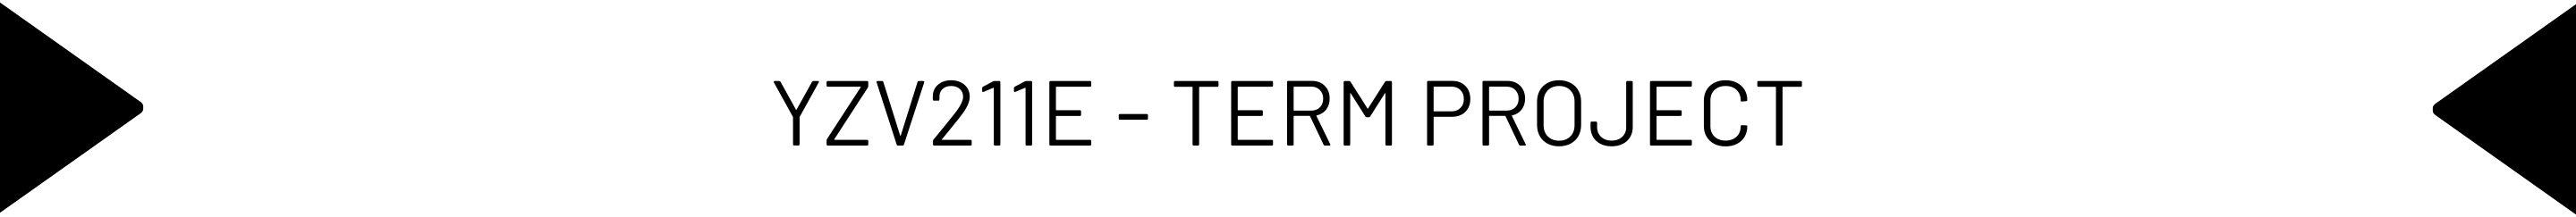

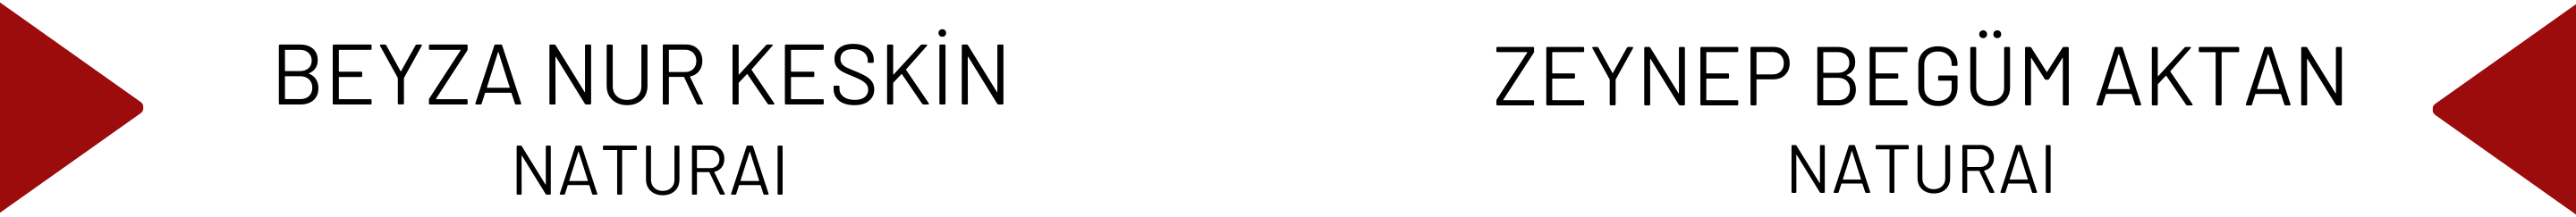

# 

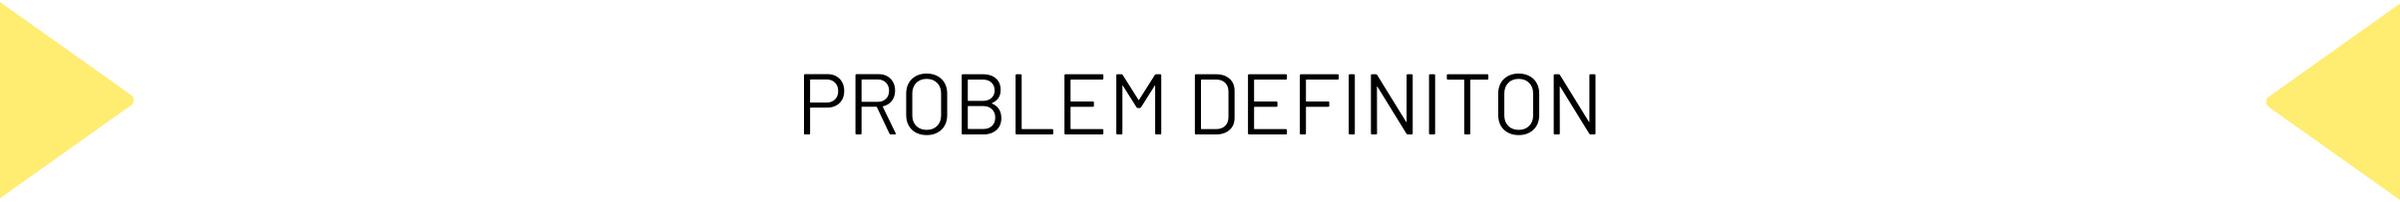

### The purpose of investigating earthquakes that occurred in the last 35 years in the region of Turkey is to determine whether there are any significant patterns in the occurrence of earthquakes.

# 

# 

In [1]:
import pandas as pd                                                  # Importing the libraries we will use
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
df   = pd.read_csv("earthquakes1985-2022.csv")                       # Importing our datasets
data = pd.read_csv("natural-disasters.csv")

# 

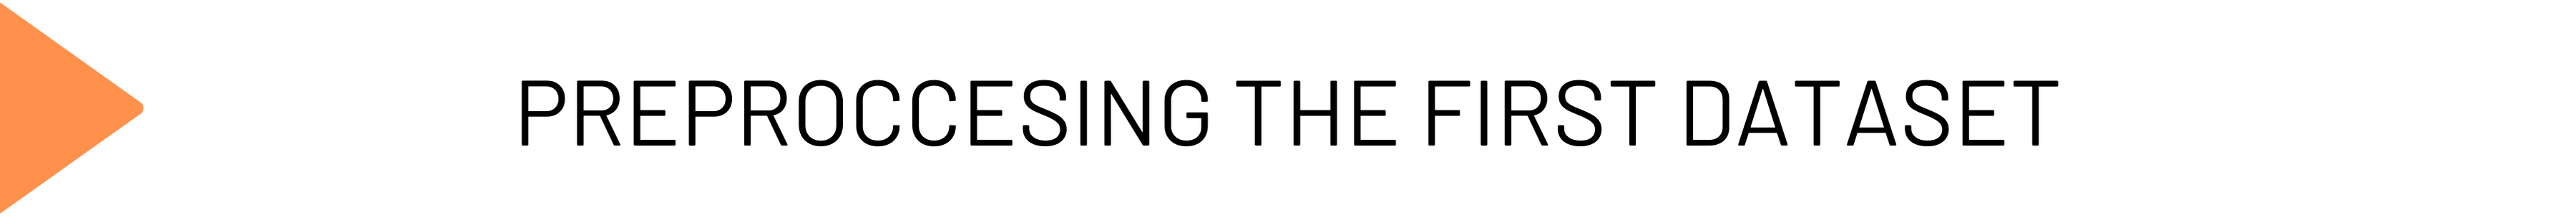

# 

In [3]:
df.head()                                                            # Examining the dataset

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-12-06T05:25:17.738Z,37.3061,62.3945,10.000,4.3,mb,23.0,166.0,3.446,0.47,...,2022-12-06T05:50:26.040Z,"3 km ENE of Yolöten, Turkmenistan",earthquake,6.84,1.942,0.201,7.0,reviewed,us,us
1,2022-12-05T14:43:28.999Z,43.5137,12.4487,4.111,4.2,mb,30.0,97.0,0.257,0.34,...,2022-12-05T17:04:54.584Z,central Italy,earthquake,3.47,7.018,0.214,6.0,reviewed,us,us
2,2022-12-04T07:12:45.059Z,38.3656,14.9687,10.276,4.4,mwr,61.0,170.0,1.754,0.54,...,2022-12-06T12:40:44.052Z,"11 km S of Lipari, Italy",earthquake,6.92,7.283,0.073,18.0,reviewed,us,us
3,2022-12-03T20:59:10.176Z,36.9257,20.9328,42.151,4.2,mb,85.0,150.0,0.833,0.95,...,2022-12-04T09:11:12.264Z,"63 km WSW of Filiatrá, Greece",earthquake,7.27,11.069,0.094,32.0,reviewed,us,us
4,2022-12-02T20:49:58.905Z,26.8256,55.1879,15.973,4.2,mb,56.0,43.0,2.084,0.50,...,2022-12-03T16:48:22.040Z,"42 km NE of Bandar-e Lengeh, Iran",earthquake,5.97,4.333,0.080,48.0,reviewed,us,us


In [4]:
df.info()                                                            # Looking at the contents of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19772 entries, 0 to 19771
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             19772 non-null  object 
 1   latitude         19772 non-null  float64
 2   longitude        19772 non-null  float64
 3   depth            19772 non-null  float64
 4   mag              19772 non-null  float64
 5   magType          19772 non-null  object 
 6   nst              7073 non-null   float64
 7   gap              10850 non-null  float64
 8   dmin             5323 non-null   float64
 9   rms              16137 non-null  float64
 10  net              19772 non-null  object 
 11  id               19772 non-null  object 
 12  updated          19772 non-null  object 
 13  place            19755 non-null  object 
 14  type             19772 non-null  object 
 15  horizontalError  5459 non-null   float64
 16  depthError       9227 non-null   float64
 17  magError    

In [5]:
df.time=df.time.str.slice(start=0,stop=4)                                          # Separating the year we'll just use it

In [6]:
df.time=df.time.astype(int)                                                        # Converting the year to an integer

In [7]:
df=df[((df.longitude>19)&(38>df.longitude)) & ((df.latitude>36)&(44>df.latitude))] # Setting the area we will examine

In [8]:
df=df[["time","latitude","longitude","mag","depth","type","place"]]                # Refresh dataset with columns to use

In [9]:
df.isnull().sum()                                                                  # Null check

time         0
latitude     0
longitude    0
mag          0
depth        0
type         0
place        6
dtype: int64

In [10]:
df.dropna(inplace=True)                                                            # Deleting Nan rows

In [11]:
for i in range(len(df.place)):                                                     # Separating the country
     df.iloc[i,6]=df.iloc[i,6].split(" ")[-1]

In [12]:
df.place.unique()

array(['Greece', 'Turkey', 'Albania', 'Montenegro', 'Bulgaria', 'Kosovo',
       'Sea', 'Macedonia', 'region', 'Romania', 'Herzegovina', 'Serbia',
       'Russia'], dtype=object)

In [13]:
df = df[(df["place"]!= "region")&                                                  # Dropping unwanted countries
        (df["place"]!= "Russia")&
        (df["place"]!= "Sea")&
        (df["place"]!= "Montenegro")&
        (df["place"]!= "Kosovo")&
        (df["place"]!= "Macedonia")]

In [14]:
df.reset_index(inplace=True)                                                       # Indexes are reset

In [15]:
df.drop("index",axis=1,inplace=True)                                               # Deleting the unnecessary column

In [16]:
df.head()                                                                 # Checking the final version of the first dataset

,time,latitude,longitude,mag,depth,type,place
0,2022,36.9257,20.9328,4.2,42.151,earthquake,Greece
1,2022,38.1456,20.0742,4.4,10.000,earthquake,Greece
2,2022,38.2945,24.2490,4.8,4.920,earthquake,Greece
3,2022,38.2939,24.3269,4.1,10.000,earthquake,Greece
4,2022,40.8392,30.9877,4.1,10.000,earthquake,Turkey


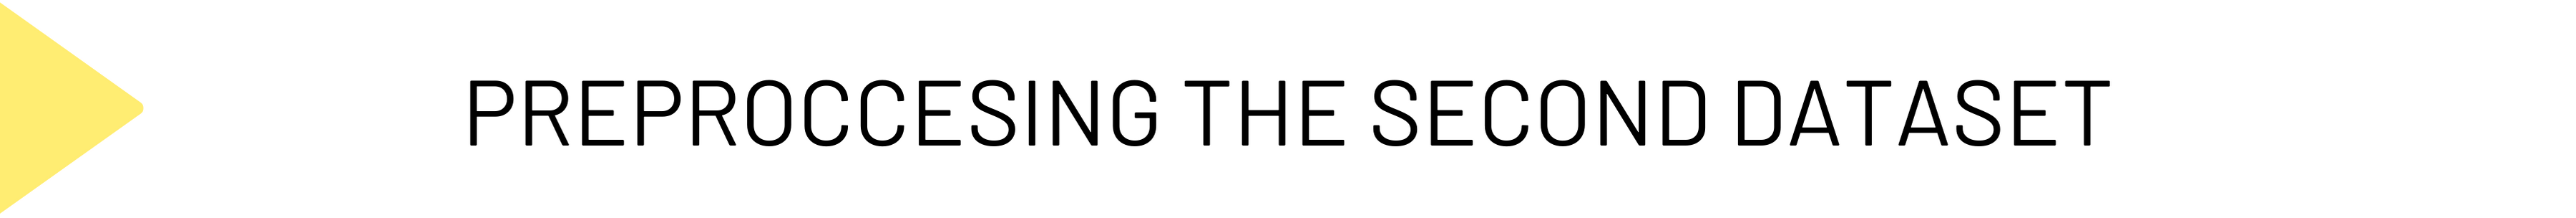

In [17]:
data.head()                                                          # Examining the dataset

,Country name,Year,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,...,Total economic damages from floods as a share of GDP,Total economic damages from landslides as a share of GDP,Total economic damages from mass movements as a share of GDP,Total economic damages from storms as a share of GDP,Total economic damages from volcanic activity as a share of GDP,Total economic damages from volcanic activity as a share of GDP.1,total_damages_pct_gdp_glacial_lake,deaths_rate_per_100k_storm,injured_rate_per_100k_storm,total_affected_rate_per_100k_all_disasters
0,Afghanistan,1900,0.0,0.0,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,Afghanistan,1910,0.0,0.0,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,Afghanistan,1920,0.0,0.0,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,Afghanistan,1930,0.0,0.0,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,Afghanistan,1940,0.0,0.0,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [18]:
data.info()                                                        # Looking at the contents of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Columns: 172 entries, Country name to total_affected_rate_per_100k_all_disasters
dtypes: float64(123), int64(48), object(1)
memory usage: 4.0+ MB


In [19]:
col_list = [col for col in data.columns if "earthquake" in col]   # Choosing the columns that are related to the earthquake
col_list.append("Year")                                           # Adding the columns we want manually
col_list.append("Country name")

In [20]:
data = data[col_list]                                             # Refresh dataset with columns to use

In [21]:
data.head()                                                       # Checking the final version of the second dataset

,Number of deaths from earthquakes,Number of people injured from earthquakes,Number of people affected by earthquakes,Number of people left homeless from earthquakes,Number of total people affected by earthquakes,Reconstruction costs from earthquakes,Insured damages against earthquakes,Total economic damages from earthquakes,Death rates from earthquakes,Injury rates from earthquakes,"Number of people affected by earthquakes per 100,000",Homelessness rate from earthquakes,"Total number of people affected by earthquakes per 100,000",Total economic damages from earthquakes as a share of GDP,Year,Country name
0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900,Afghanistan
1,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1910,Afghanistan
2,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1920,Afghanistan
3,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1930,Afghanistan
4,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1940,Afghanistan


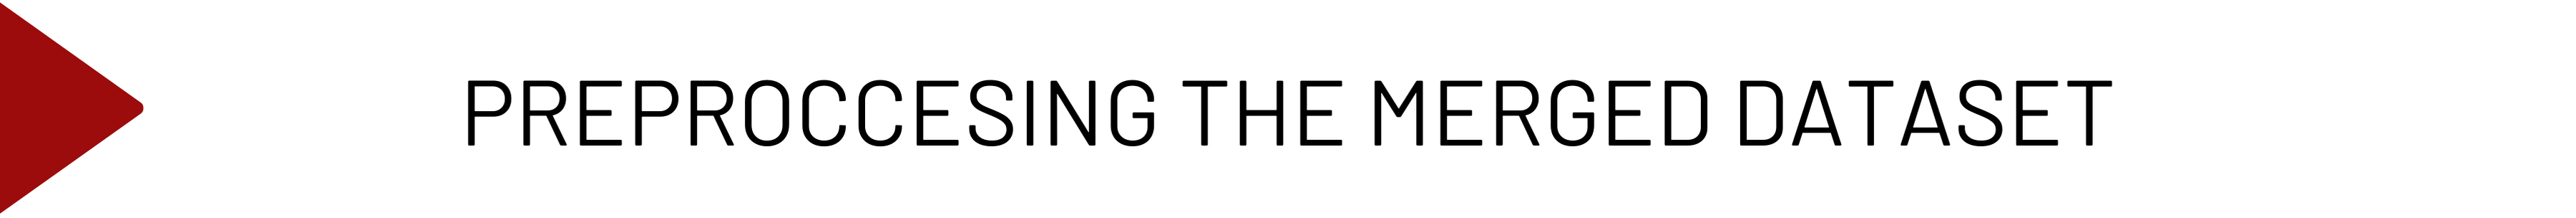

In [22]:
data_final = pd.DataFrame(columns=data.columns)                   # Creating a new dataset to combine the two datasets

In [23]:
countries = list(df.place.unique())                               # Creating a country list to use the same countries

In [24]:
for country in countries:                                         # Adjusting to have selected the same countries
    
    data_final = pd.concat([data_final,data[data["Country name"] == country]])

In [25]:
data_final.columns=["death_number","injured_num","affected_num","homeless_num",           #Editing the names of the columns
                  "total_affected_num","reconstruction_cost","insured_damage",
                  "economic_damage","death_rate","injury_rate","affected_per_100",
                  "homeless_rate","total_affected_100","economic_damage_gdp","year","country"]

In [26]:
data_final.drop(['reconstruction_cost', 'insured_damage',                                 # Deleting unnecessary columns
       'economic_damage', 'death_rate', 'injury_rate',
                 "homeless_rate","economic_damage_gdp" ],axis=1,inplace=True)

In [27]:
data_final = data_final[data_final["year"]>1980]          # Adjusting the year column to have common years in both datasets

In [28]:
data_final.reset_index(drop=True,inplace=True)            # Indexes are reset

In [29]:
df["year_group"]=0                                        # Making some adjustments as we will combine the two datasets

for i in range(len(df.time)):                             # Grouping the years
    
    
    if 2010<df.loc[i,"time"]<=2020:
        df.loc[i,"year_group"]=2020
                
        
    elif 2000<df.loc[i,"time"]<=2010:        
        df.loc[i,"year_group"]=2010
                
        
    elif 1990<df.loc[i,"time"]<=2000:        
        df.loc[i,"year_group"]=2000
        
               
    elif 1980<df.loc[i,"time"]<=1990:        
        df.loc[i,"year_group"]=1990

In [30]:
for year in df.year_group.unique():
    for place in df.place.unique():
        data_final.loc[(data_final["country"]==place)&(data_final["year"]==year),"average_mag"] = df[(df["place"]==place)&(df["year_group"]==year)]["mag"].mean()
        data_final.loc[(data_final["country"]==place)&(data_final["year"]==year),"average_depth"] = df[(df["place"]==place)&(df["year_group"]==year)]["depth"].mean()


In [31]:
data_final.head()                                         # Checking the final version of the merged dataset

,death_number,injured_num,affected_num,homeless_num,total_affected_num,affected_per_100,total_affected_100,year,country,average_mag,average_depth
0,19.7,224.2,13913.1,640.8,14778.1,127.16251,135.18071,1990,Greece,4.319145,32.795167
1,0.2,30.7,451.8,0.0,482.5,4.081464,4.358518,2000,Greece,4.310041,28.155072
2,0.6,15.6,7772.0,0.0,7787.6,71.55638,71.70191,2010,Greece,4.337420,23.913753
3,1.0,16.666666,300.0,1672.0,1988.6666,2.853818,19.020088,2020,Greece,4.443341,19.207864
4,1887.6,5650.4,276759.0,88710.0,371119.4,447.81815,599.7719,1990,Turkey,4.383607,25.067760


In [32]:
data.to_csv("data.csv")                                   # Saving final dataset for research questions

In [33]:
df.to_csv("df.csv")

In [34]:
data_final.to_csv("final.csv")

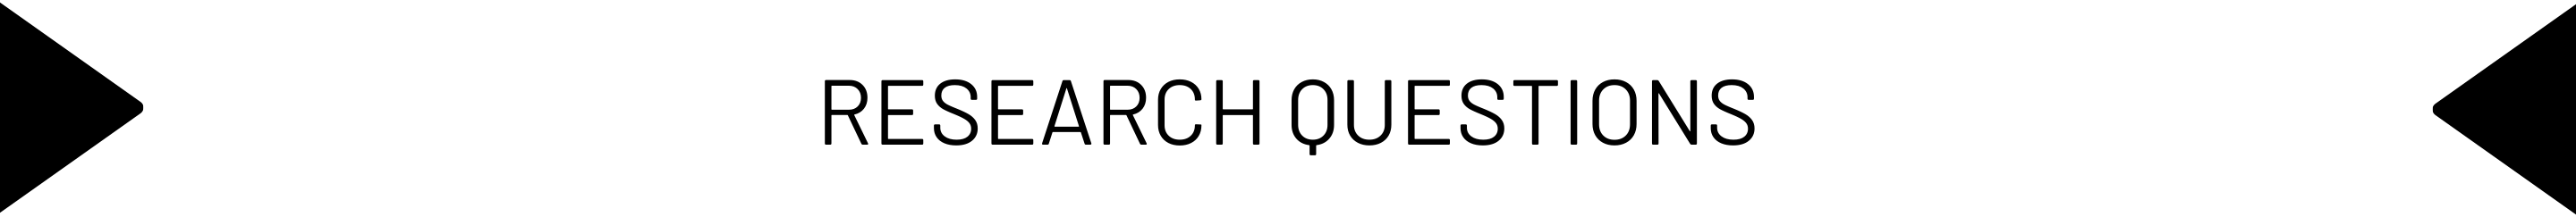

# 

In [35]:
import pandas as pd                                # Importing the libraries we will use
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from scipy import stats

In [36]:
df   = pd.read_csv("df.csv")                       # Importing our datasets
data = pd.read_csv("data.csv")
data_final = pd.read_csv("final.csv")

#  

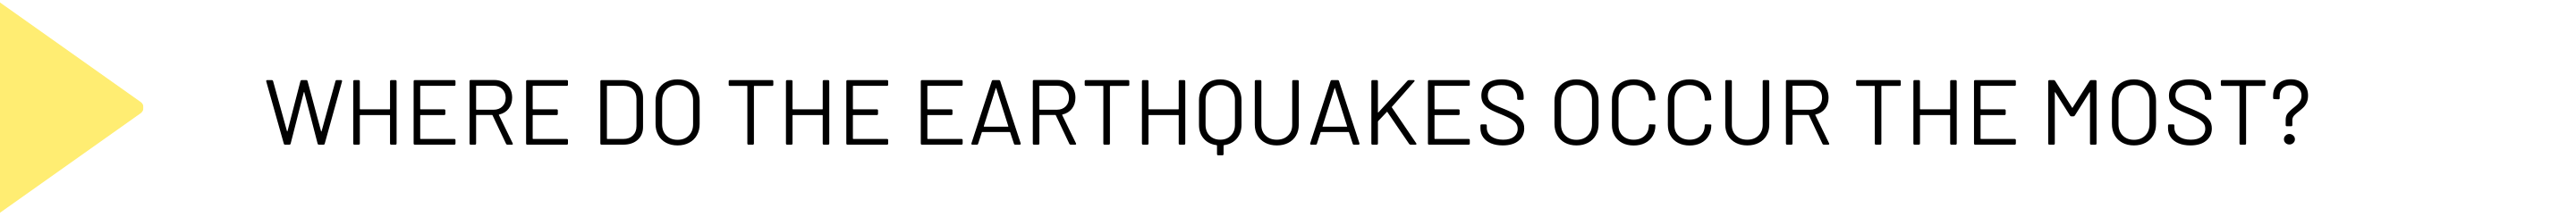

<AxesSubplot:>

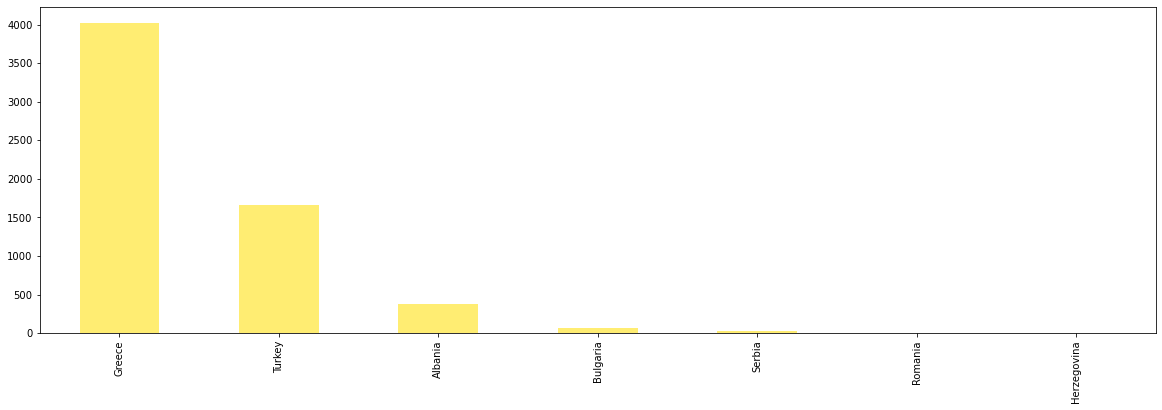

In [37]:
plt.figure(figsize=(20,6))
df["place"].value_counts().plot(kind="bar",color="#FFED72")

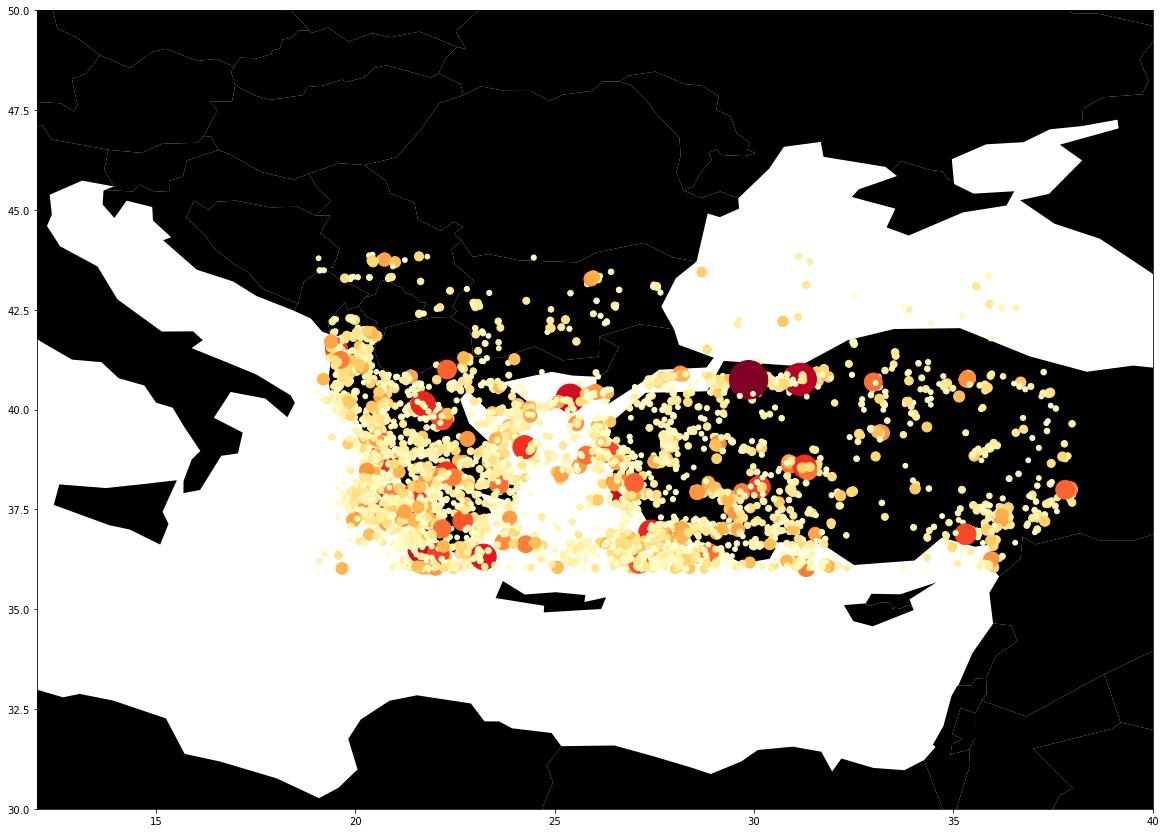

In [38]:
#We view earthquakes greater than 4 magnitudes in the area we set.

fig,ax=plt.subplots(figsize=(20,20))                                 
earth= gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

earth.plot(color="black", ax=ax)
ax.set_xlim(12,40)
ax.set_ylim(30,50)
ax.scatter(df["longitude"],df["latitude"],s=(df["mag"]**6.5)/90,c=df["mag"],marker=".",cmap="YlOrRd")

# 

# 

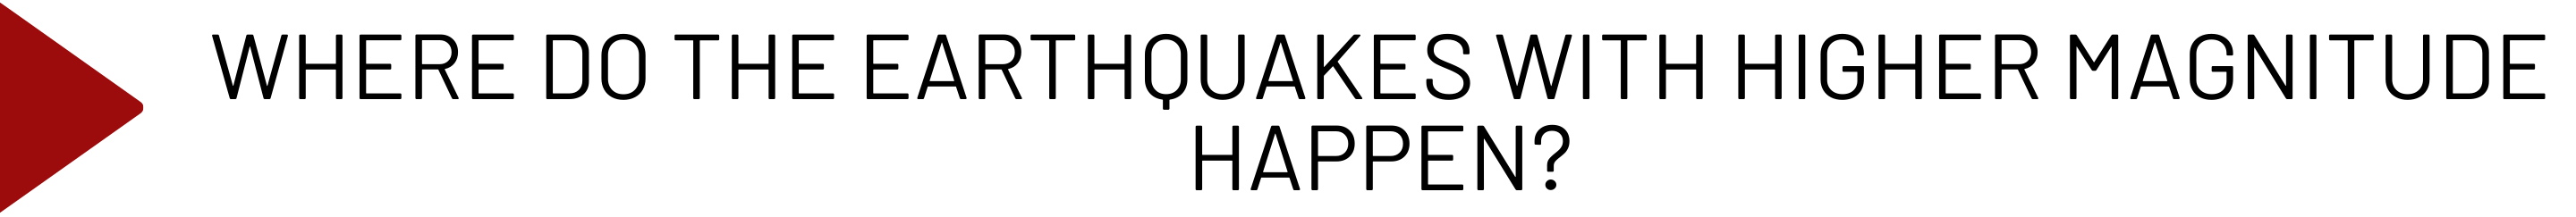

#### According to the graph, we can say the earthquakes with the highest average magnitude happened in Serbia. The average magnitudes are similar.

<AxesSubplot:title={'center':'Average magnitudes of the earthquakes'}, xlabel='place', ylabel='magnitude'>

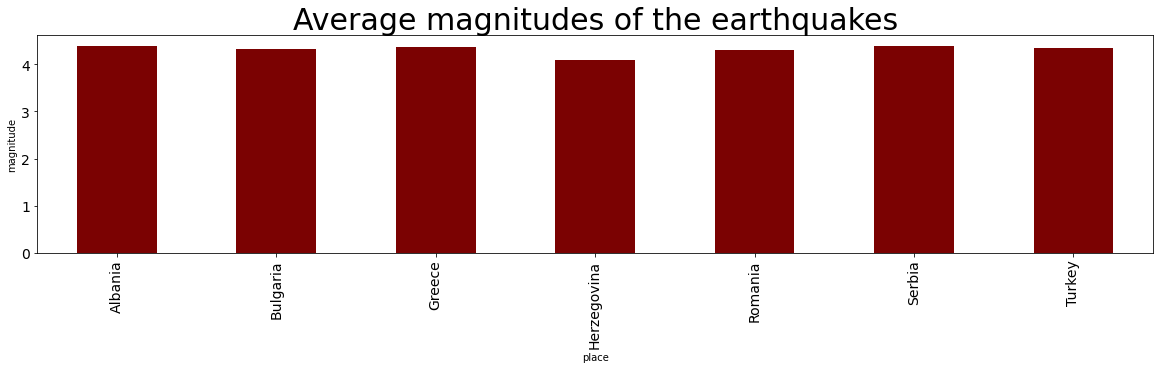

In [39]:
plt.figure(figsize=(20,4))
plt.title("Average magnitudes of the earthquakes",fontsize=30)
plt.ylabel("magnitude")
df.groupby(["place"])["mag"].mean().plot(kind="bar",color = "#7B0202",fontsize=14)

In [40]:
#Showing the earthquakes with magnitudes higher than 5 in the map
#Here we can see some of the most significant earthquakes.

big_mag=df[df["mag"]>5]

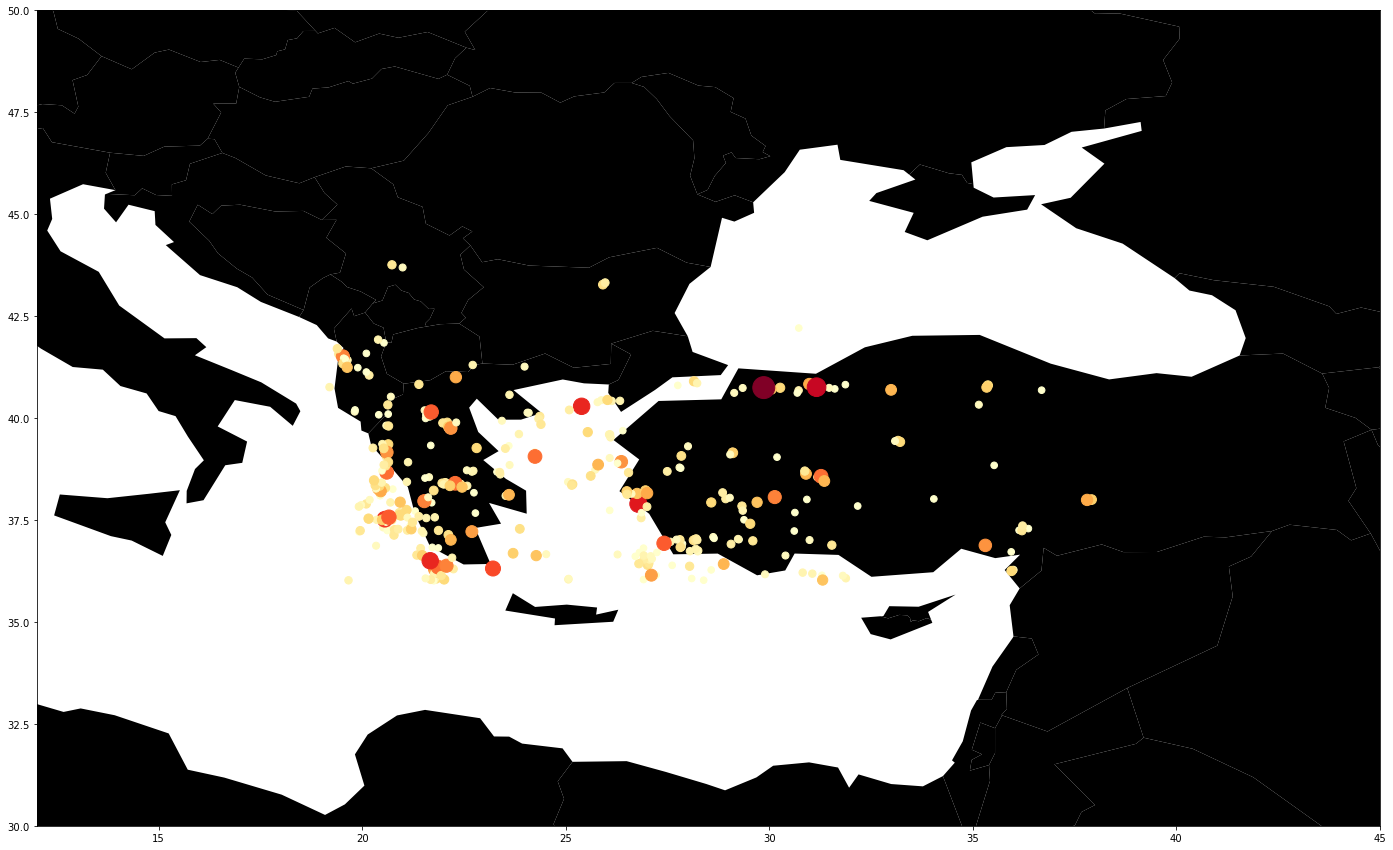

In [41]:
#We view earthquakes greater than 5 magnitudes in the area we set.

fig,ax=plt.subplots(figsize=(25,15))
earth= gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

earth.plot(color="black", ax=ax)
ax.set_xlim(12,45)
ax.set_ylim(30,50)
ax.scatter(big_mag["longitude"],big_mag["latitude"],s=(big_mag["mag"]**6)/100,c=big_mag["mag"],marker=".",cmap="YlOrRd")

# 

# 

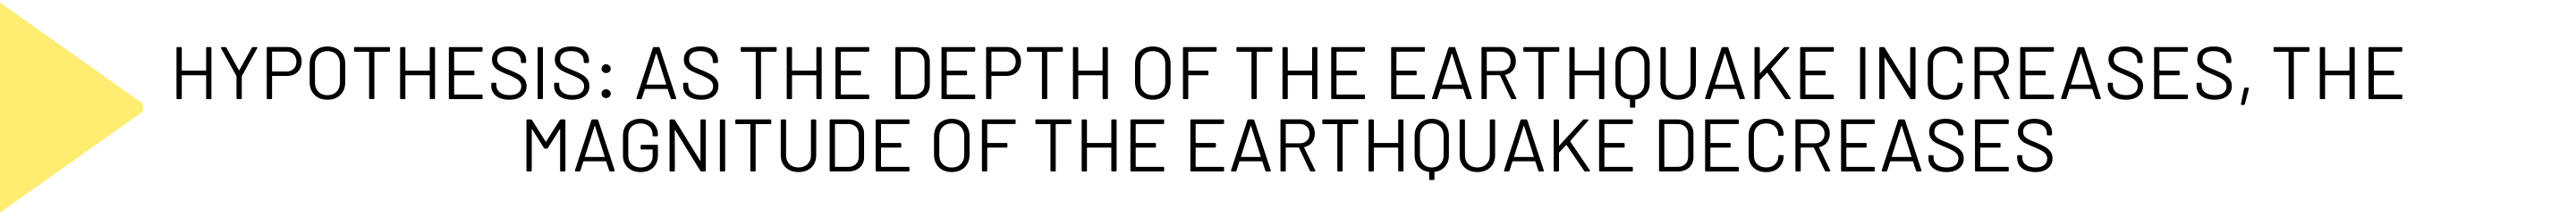

#### First we plot histograms to understand the distributions of magnitude and depth. They look right-skewed.

<AxesSubplot:title={'center':'Distribution of the depth'}, ylabel='Frequency'>

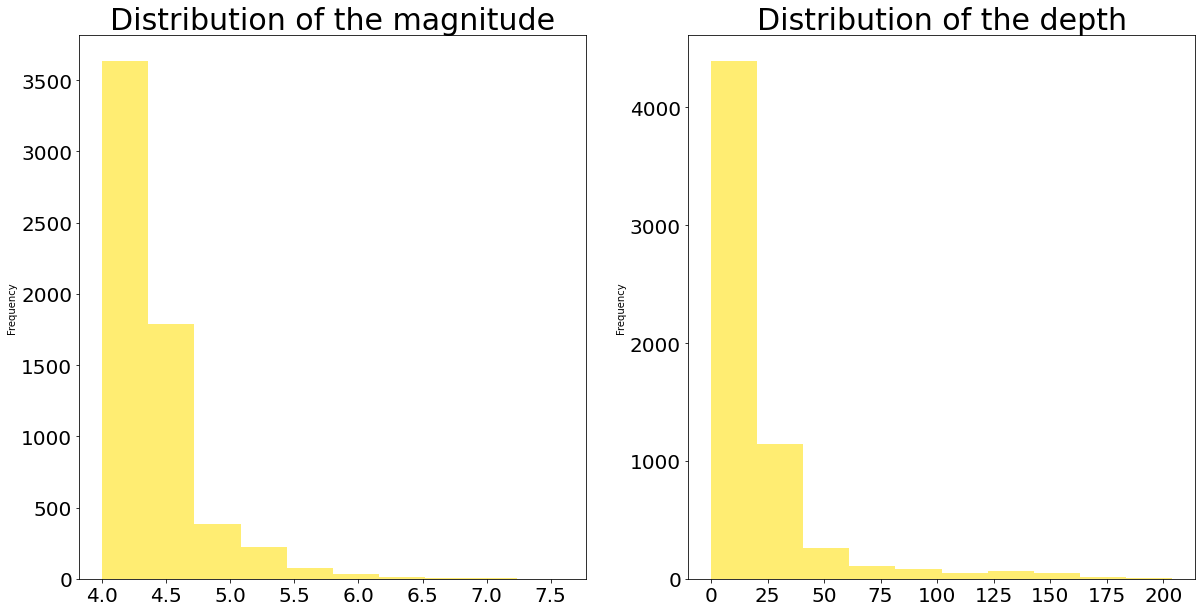

In [42]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
df["mag"].plot(kind="hist",color="#FFED72",fontsize=20)
plt.title("Distribution of the magnitude",fontsize=30)
plt.subplot(1,2,2)
plt.title("Distribution of the depth",fontsize=30)
df["depth"].plot(kind="hist",color="#FFED72",fontsize=20)

# 

### By plotting a scatter plot, we tried to see if there was a relevant relationship between the depth and magnitude. It looks like there isn't any significant relation.

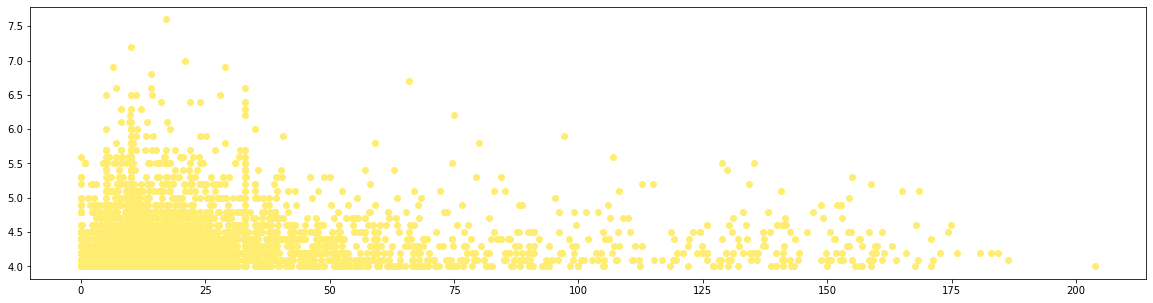

In [43]:
plt.figure(figsize=(20,5))
plt.scatter(df["depth"],df["mag"],color="#FFED72")

### Then we checked the correlation table, but the correlation between the magnitude and the depth is -0.014, therefore they're not correlated.

<AxesSubplot:>

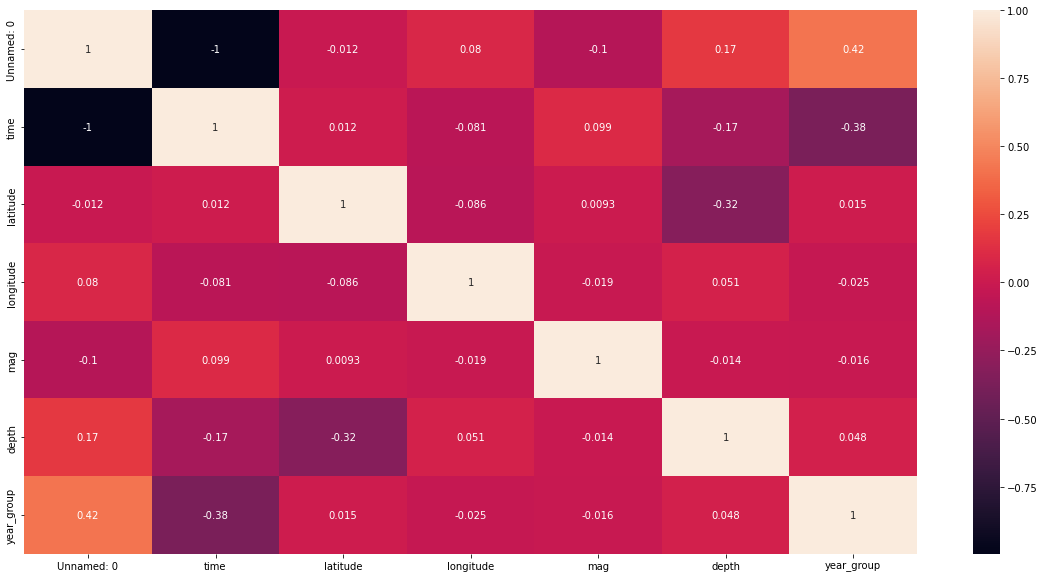

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

### We applied Spearman Statistics test to double-check. The null hypothesis is that the magnitude and the depth is uncoorelated. The p-value is very high, therefore we can say depth is not correlated with the magnitude.

In [45]:
stats.spearmanr(df["depth"],df["mag"])

SpearmanrResult(correlation=-0.0057702076465558656, pvalue=0.6506202117339572)

# 

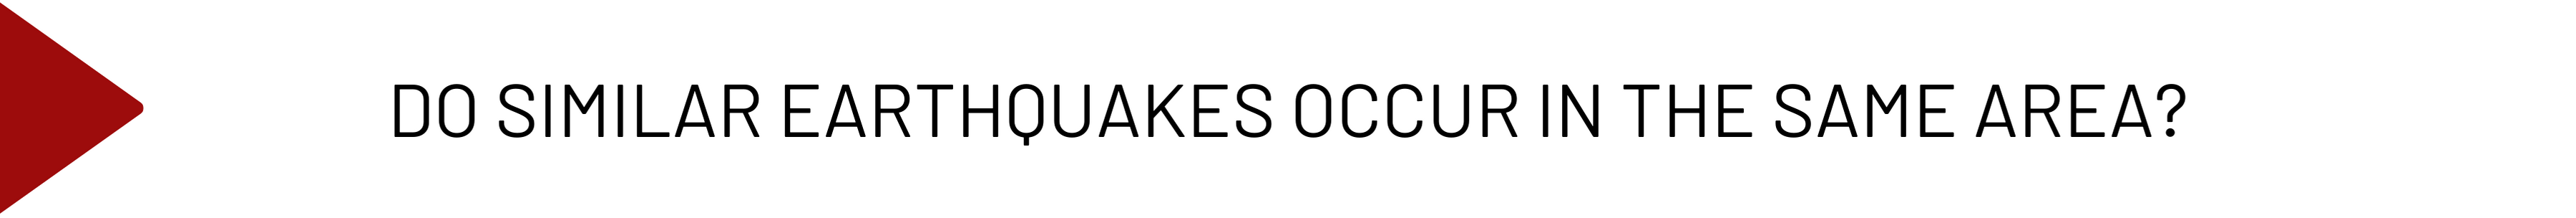

### As we can see in the table below, in some regions the earthquakes have occured for more than 1 time.

In [46]:
df["long_categories"]=pd.cut(df['longitude'], 15)
df["lati_categories"]=pd.cut(df['latitude'], 10)
df.groupby(["long_categories","lati_categories"])["mag"].agg(['size', 'max',"min","median","mean"]).dropna()

size  max  min  median      mean
long_categories  lati_categories                                   
(19.051, 20.331] (35.994, 36.79]      7  5.3  4.0    4.30  4.471429
                 (36.79, 37.578]     36  5.7  4.0    4.40  4.461111
                 (37.578, 38.366]   158  5.6  4.0    4.30  4.331013
                 (38.366, 39.154]    23  5.7  4.0    4.10  4.286957
                 (39.154, 39.942]    45  5.4  4.0    4.20  4.302222
...                                 ...  ...  ...     ...       ...
(36.728, 37.989] (37.578, 38.366]    30  6.1  4.0    4.40  4.476667
                 (38.366, 39.154]     7  4.9  4.0    4.40  4.385714
                 (39.154, 39.942]     8  4.7  4.0    4.15  4.225000
                 (39.942, 40.731]    10  4.9  4.0    4.15  4.260000
                 (40.731, 41.519]     1  4.2  4.2    4.20  4.200000

[132 rows x 5 columns]

# 

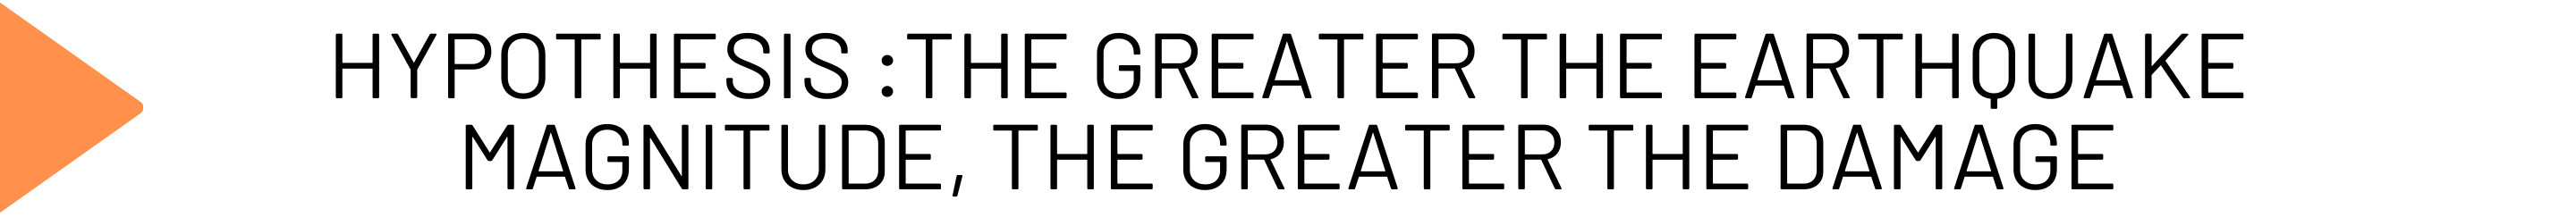

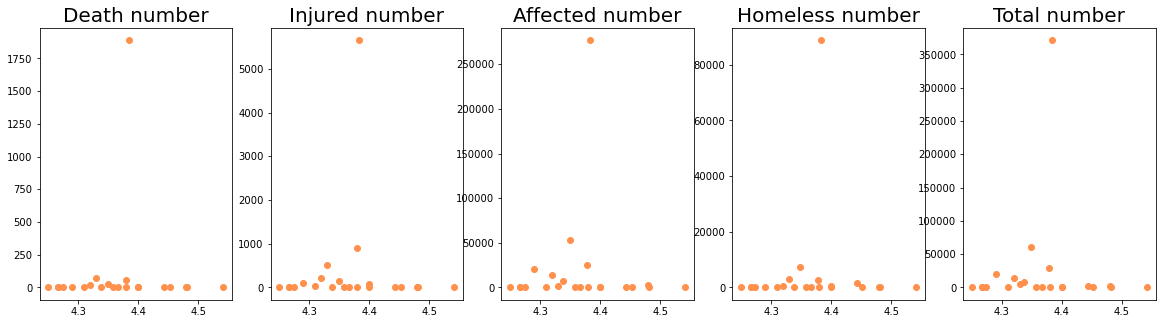

In [49]:
plt.figure(figsize=(20,5))

plt.subplot(1, 5, 1)
plt.scatter(data_final["average_mag"],data_final["death_number"],color="#FF914D")
plt.title("Death number",fontsize=20)


plt.subplot(1, 5, 2)
plt.scatter(data_final["average_mag"],data_final["injured_num"],color="#FF914D")
plt.title("Injured number",fontsize=20)


plt.subplot(1, 5, 3)
plt.scatter(data_final["average_mag"],data_final["affected_num"],color="#FF914D")
plt.title("Affected number",fontsize=20)


plt.subplot(1, 5, 4)
plt.scatter(data_final["average_mag"],data_final["homeless_num"],color="#FF914D")
plt.title("Homeless number",fontsize=20)


plt.subplot(1, 5, 5)
plt.scatter(data_final["average_mag"],data_final["total_affected_num"],color="#FF914D")
plt.title("Total number",fontsize=20)

plt.show()

<AxesSubplot:>

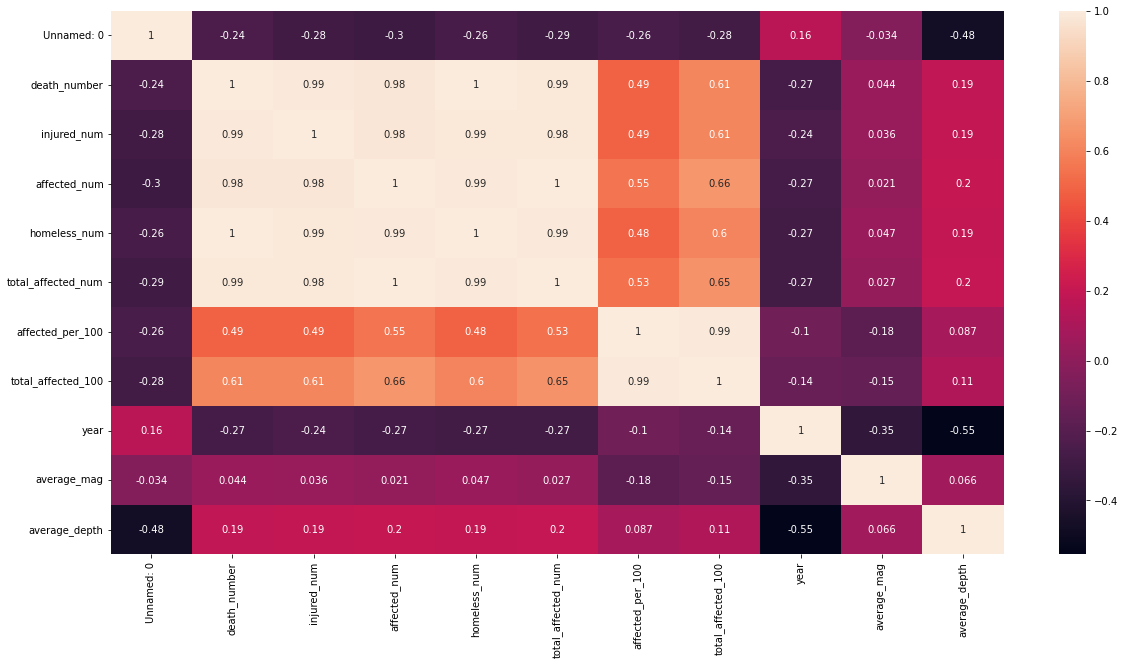

In [51]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(data_final.corr(),annot=True)

### There wasn't much of a corralation. The possible reasons for this may be because it is a study conducted with countries with different economic levels.

In [53]:
data_final.corr()["average_mag"].nlargest(11) 

average_mag           1.000000
average_depth         0.065583
homeless_num          0.047015
death_number          0.044395
injured_num           0.036399
total_affected_num    0.027356
affected_num          0.020825
Unnamed: 0           -0.034163
total_affected_100   -0.152813
affected_per_100     -0.179574
year                 -0.352661
Name: average_mag, dtype: float64

# 

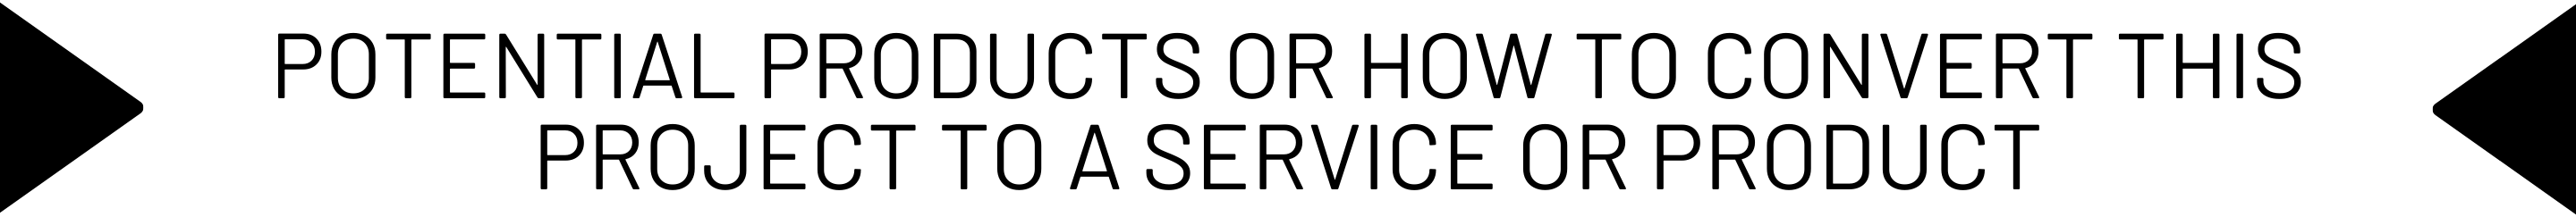

###  Earthquake prediction and warning systems: By analyzing data on past earthquakes, it is possible to develop models and algorithms that can be used to predict the likelihood of future earthquakes and issue early warning alerts to people in affected areas.

###  Risk assessment and preparedness planning: Knowing about past earthquakes can help governments, businesses, and communities assess the risk of future earthquakes and develop preparedness plans to mitigate the impact of these events.

###  Earthquake insurance: Insurance companies can use data on past earthquakes to assess the risk of future earthquakes and set premiums accordingly.



# 

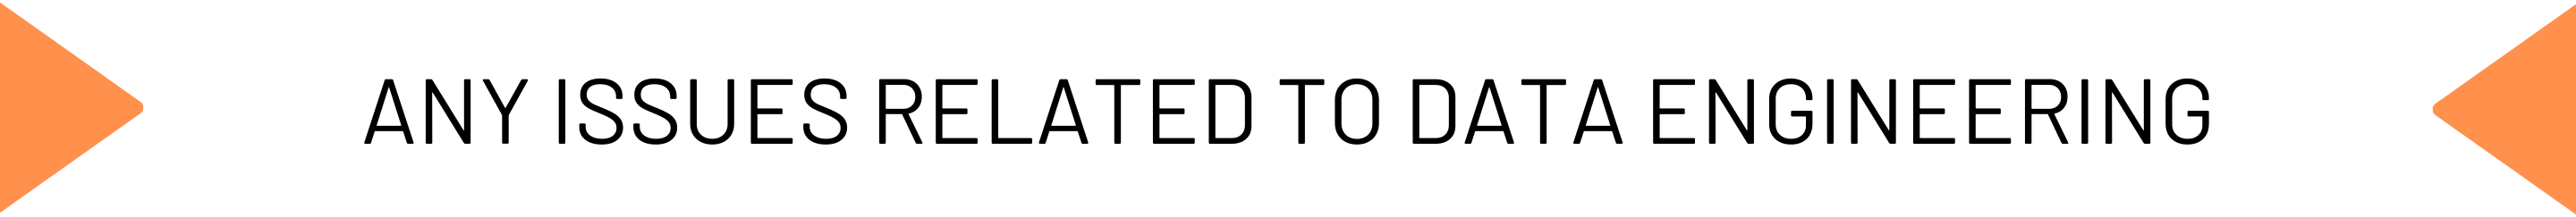

# 

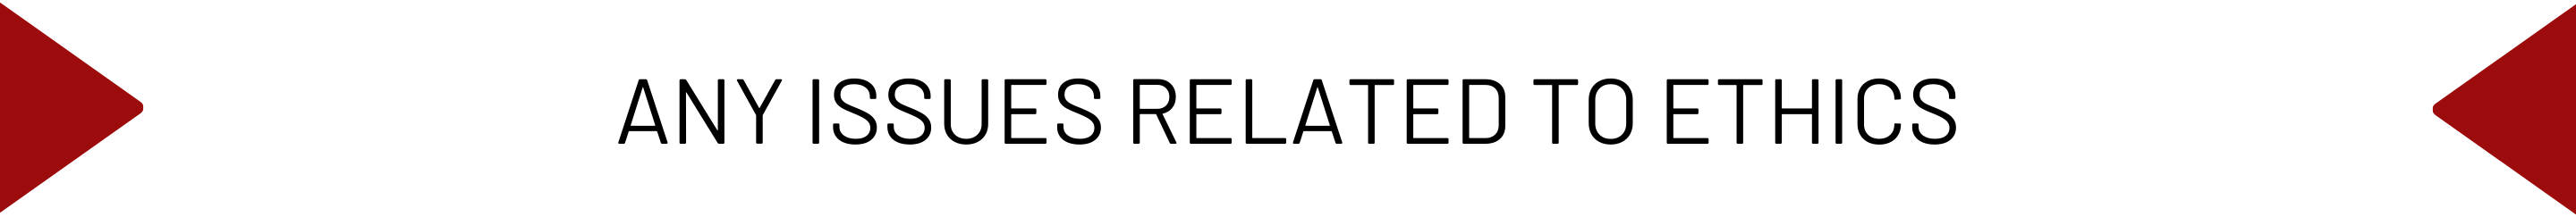

###  Privacy: When collecting and analyzing data on past earthquakes, it is important to ensure that the privacy of individuals and communities affected by these events is protected. This may involve obtaining consent from individuals before collecting their personal data and taking measures to de-identify data before it is shared or used for research purposes.

###  Equity: There is a risk that data on past earthquakes could be used to disproportionately benefit certain groups, or to discriminate against others. For example, data on past earthquakes might be used to justify higher insurance premiums in certain areas, which could disproportionately affect lower-income communities. It is important to consider the potential impacts on marginalized or disadvantaged groups and to ensure that data is used in an ethical and equitable manner.

###  Misuse: Data on past earthquakes could be misused or misinterpreted, leading to incorrect conclusions or decisions. It is important to ensure that data is analyzed and used responsibly, and that appropriate safeguards are in place to prevent misuse.

###  Transparency: There should be transparency in the collection, analysis, and use of data on past earthquakes, so that stakeholders can understand how the data is being used and how it might affect them.

# 

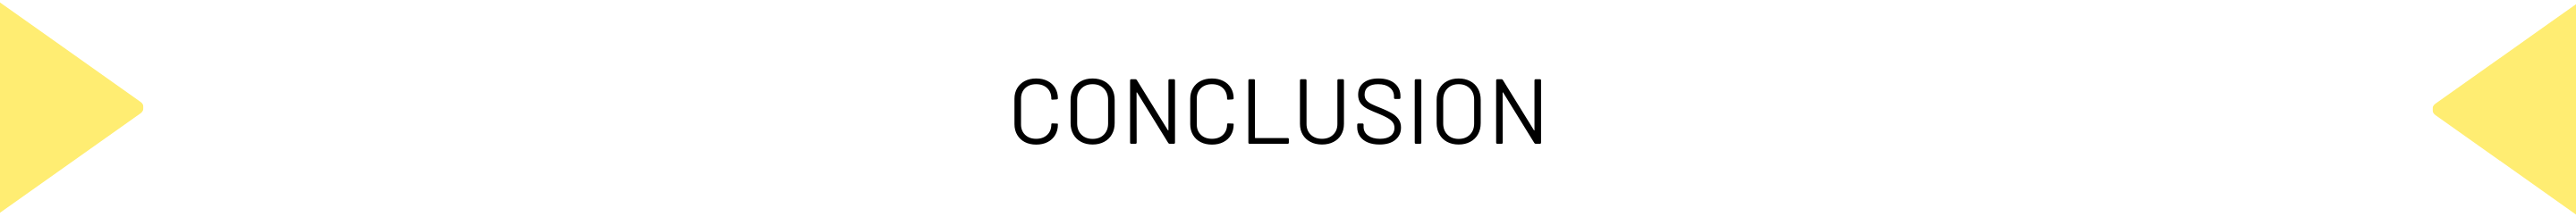

### Earthquake was selected as a natural disaster and columns that did not carry information about the earthquake were deleted.

### The data of the desired countries were separated from the two datasets containing many countries.

### The information in two different data sets was combined by grouping according to years.

### Research questions were identified and additional columns to assist with this were added to the dataset.

### Hypotheses were tried to be explained with various graphics, statistical tests and maps. 

# 

![Ads%C4%B1z%20%281920%20%C3%97%20108%20piksel%29%20(1920%20%C3%97%20162%20piksel).png](attachment:Ads%C4%B1z%20%281920%20%C3%97%20108%20piksel%29%20(1920%20%C3%97%20162%20piksel).png)
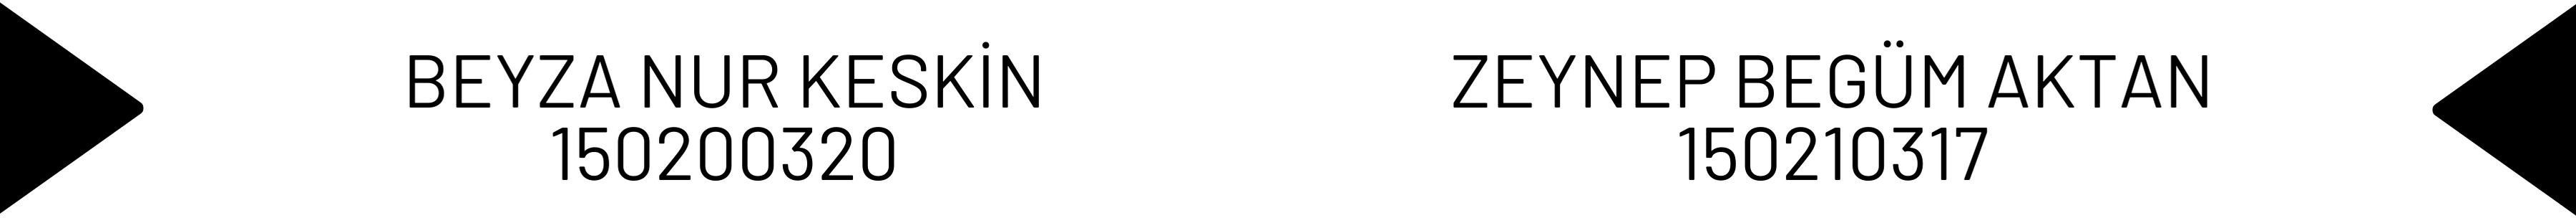

# 

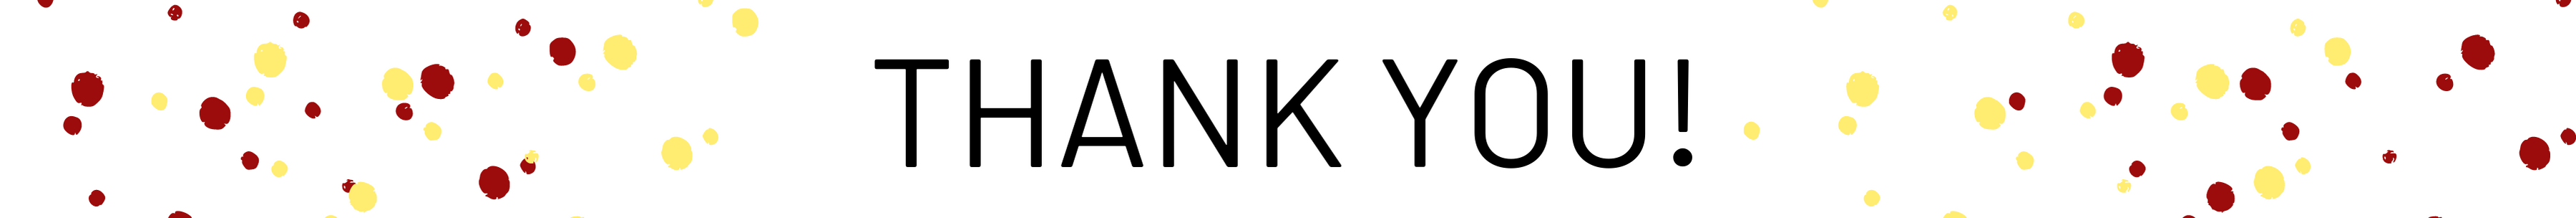

# 